In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("1-studyhours.csv")

In [4]:
df.head()

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7


In [5]:
X=df[["Study Hours"]]
y=df["Exam Score"]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15)

In [8]:
X_train

,Study Hours
18,17.4
1,9.6
2,4.5
32,18.9
6,19.2
3,11.4
29,19.5
26,9.6
9,17.4
4,14.4


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler=StandardScaler()

In [11]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [12]:
X_train

array([[ 0.11794385],
       [-0.97424848],
       [-1.68837424],
       [ 0.32798083],
       [ 0.36998823],
       [-0.7222041 ],
       [ 0.41199563],
       [-0.97424848],
       [ 0.11794385],
       [-0.30213013],
       [ 0.15995124],
       [ 0.66404001],
       [-0.13410054],
       [ 1.50418796],
       [-0.51216711],
       [ 0.15995124],
       [-0.30213013],
       [ 1.21013618],
       [ 1.33615837],
       [ 0.7900622 ],
       [-1.77238903],
       [-1.89841122],
       [ 0.20195864],
       [ 1.88225453],
       [-1.18428547],
       [ 1.21013618]])

In [13]:
 from sklearn.linear_model import LinearRegression

In [14]:
regression=LinearRegression()

In [15]:
regression.fit(X_train,y_train)

LinearRegression()

In [16]:
print("Coefficient",regression.coef_)
print("Intercept",regression.intercept_)

Coefficient [16.17860223]
Intercept 76.9076923076923


In [17]:
# y= 76.91 + 16 x

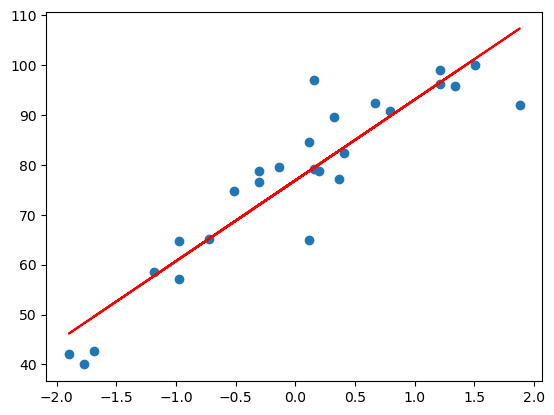

In [18]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),"r")
plt.show()

In [19]:
#x=20, y=?

In [20]:
regression.predict([[20]])

array([400.47973694])

In [21]:
scaler.transform([[20]])

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.48200796]])

In [22]:
regression.predict(scaler.transform([[20]]))

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([84.70590731])

In [23]:
regression.predict(scaler.transform([[2]]))

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([43.92864899])

In [24]:
#Prediction with test data

In [28]:
y_pred_test=regression.predict(X_test)

In [29]:
y_pred_test

array([50.95139904, 86.97131054, 92.40827832, 52.31064098, 61.14571361,
       48.23291515, 87.65093152])

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [35]:
mse=mean_squared_error(y_test,y_pred_test)
mas=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred_test))
print("mse: ",mse)
print("mas: ",mas)
print("rmse: ",rmse)

mse:  29.45839048833392
mas:  4.054868128856142
rmse:  5.427558427906043


In [36]:
r2=r2_score(y_test,y_pred_test)
print("r2 score:",r2)

r2 score: 0.9196596206825491


In [37]:
r2_adjusted=1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [38]:
r2_adjusted

0.903591544819059